In [24]:
# Import libraries and modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time


In [39]:
# List of continents to iterate over
continents = ['Asia', 'Africa', 'Americas', 'Europe', 'Oceania']

# Iterate over each continent and calculate the overall mean age at first marriage
for continent in continents:
    df = pd.DataFrame(continent_data.get(continent, []))

    # Clean the 'Average' column to ensure it is numeric
    df['Average'] = df['Average'].replace({',': ''}, regex=True)  # Remove commas if any
    df['Average'] = pd.to_numeric(df['Average'], errors='coerce')  # Convert to numeric

    # Drop any rows with missing data in the 'Average' column
    df = df.dropna(subset=['Average'], how='any')

    # Calculate the overall mean age at first marriage for the continent
    mean_average = df['Average'].mean()

    print(f"Overall Mean Age at First Marriage for {continent}: {mean_average:.2f} years")


Overall Mean Age at First Marriage for Asia: 27.20 years
Overall Mean Age at First Marriage for Africa: 25.34 years
Overall Mean Age at First Marriage for Americas: 28.90 years
Overall Mean Age at First Marriage for Europe: 31.81 years
Overall Mean Age at First Marriage for Oceania: 26.34 years


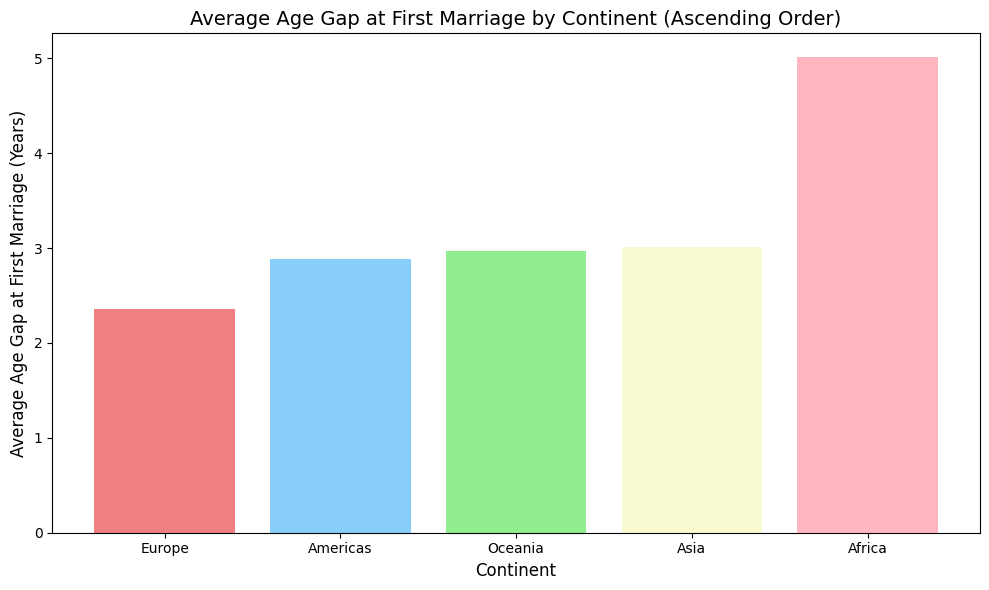

In [42]:


# Sort the data in ascending order
sorted_data_gap = sorted(average_age_gaps.items(), key=lambda x: x[1])
sorted_continents_gap, sorted_average_age_gaps = zip(*sorted_data_gap)

# Colors for the bars
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightgoldenrodyellow', 'lightpink']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_continents_gap, sorted_average_age_gaps, color=colors)

# Adding title and labels
plt.title('Average Age Gap at First Marriage by Continent (Ascending Order)', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average Age Gap at First Marriage (Years)', fontsize=12)

# Display the bar chart
plt.tight_layout()
plt.show()


**Key Comparison of Asia’s Age Gap at First Marriage with Other Continents:**

- **Asia (3.01 years)** has a **moderate age gap**, larger than **Europe (2.36 years)** and **Americas (2.90 years)**, but smaller than **Africa (5.01 years)**.
- **Africa** has the **largest age gap**, indicating more traditional marriage patterns.
- **Europe** shows a **minimal gap**, suggesting greater gender equality in marriage ages.
- **Americas (2.90 years)** and **Oceania (2.96 years)** have **slightly smaller gaps** than Asia, reflecting a more balanced approach to marriage ages.

In summary, Asia’s age gap is **higher than Europe, the Americas and Oceania**, but **lower than Africa**, positioning it as a middle-ground in global marriage trends.


## Comparison of Average Age at First Marriage for Men and Women Asia vs. Other Continents

In [44]:

# Define the continents
continents = ['Asia', 'Africa', 'Americas', 'Europe', 'Oceania']
average_men_ages = []
average_women_ages = []

# Loop through each continent and calculate the average age for men and women
for continent in continents:
    df = pd.DataFrame(continent_data.get(continent, []))
    
    # Clean the 'Men' and 'Women' columns to ensure they are numeric
    df['Men'] = df['Men'].replace({',': ''}, regex=True)  # Remove commas if any
    df['Men'] = pd.to_numeric(df['Men'], errors='coerce')  # Convert to numeric
    df['Women'] = df['Women'].replace({',': ''}, regex=True)  # Remove commas if any
    df['Women'] = pd.to_numeric(df['Women'], errors='coerce')  # Convert to numeric
    
    # Drop any rows with missing data in the 'Men' or 'Women' columns
    df = df.dropna(subset=['Men', 'Women'], how='any')
    
    # Calculate the overall mean age for men and women for the continent
    mean_men_age = df['Men'].mean()
    mean_women_age = df['Women'].mean()
    
    average_men_ages.append(mean_men_age)
    average_women_ages.append(mean_women_age)

# Printing out the results for comparison
for continent, men_age, women_age in zip(continents, average_men_ages, average_women_ages):
    print(f"{continent}: Men = {men_age:.2f} years, Women = {women_age:.2f} years")


Asia: Men = 28.69 years, Women = 25.68 years
Africa: Men = 27.83 years, Women = 22.82 years
Americas: Men = 30.33 years, Women = 27.45 years
Europe: Men = 32.97 years, Women = 30.61 years
Oceania: Men = 27.81 years, Women = 24.84 years


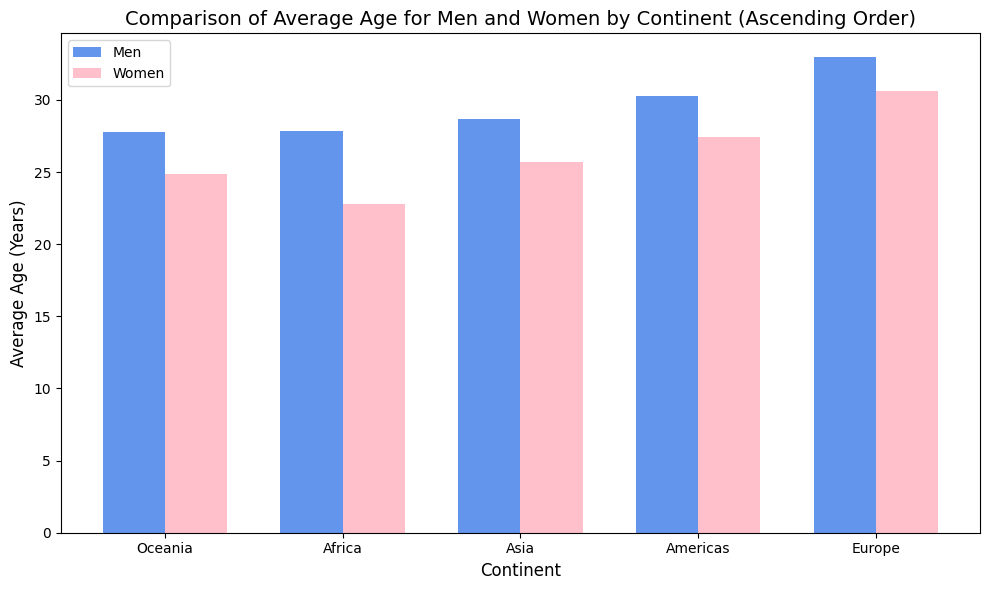

In [45]:


# Actual data from your calculation
continents = ['Asia', 'Africa', 'Americas', 'Europe', 'Oceania']
average_men_ages = [28.69, 27.83, 30.29, 32.97, 27.81]
average_women_ages = [25.68, 22.82, 27.40, 30.61, 24.84]

# Sort the data based on the average age of men
sorted_data = sorted(zip(continents, average_men_ages, average_women_ages), key=lambda x: x[1])
sorted_continents, sorted_men_ages, sorted_women_ages = zip(*sorted_data)

# Set the positions for the bars
x = np.arange(len(sorted_continents))
width = 0.35  # Width of the bars

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for men and women
rects1 = ax.bar(x - width/2, sorted_men_ages, width, label='Men', color='#6495ED')
rects2 = ax.bar(x + width/2, sorted_women_ages, width, label='Women', color='pink')

# Adding title and labels
ax.set_title('Comparison of Average Age for Men and Women by Continent (Ascending Order)', fontsize=14)
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Average Age (Years)', fontsize=12)

# Set the x-ticks to match the continents
ax.set_xticks(x)
ax.set_xticklabels(sorted_continents)

# Adding a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


**Analysis of Average Age for Men and Women in Asia:**

- **Asian Men:**
  - The average age for men in Asia is **28.69 years**, which places them **3rd** among the continents, behind Europe (32.97 years) and the Americas (30.29 years), but ahead of Africa (27.83 years) and Oceania (27.81 years).
  - This suggests that Asian men tend to marry at a relatively younger age than those in Europe and the Americas, but older than those in Africa and Oceania. This could indicate a more traditional approach to marriage, with men marrying after they have established themselves, but not as late as in some Western or wealthier regions.

- **Asian Women:**
  - The average age for women in Asia is **25.68 years**, which places them **3rd** as well, behind Europe (30.61 years) and the Americas (27.40 years), but ahead of Africa (22.82 years) and Oceania (24.84 years).
  - Similar to men, women in Asia tend to marry at a younger age than their counterparts in Europe and the Americas, but later than those in Africa. This could reflect regional socio-cultural norms where women marry at an age when they are socially and economically prepared, but still relatively younger compared to Western countries.

- Both **Asian men** and **Asian women** fall in the **middle** range in terms of average age at first marriage when compared to other continents, suggesting that marriage age in Asia is moderate, neither too young nor too late, with cultural variations across countries.


## Comparing the Average Age at Marriage in Asia with Other Countries Across Continents

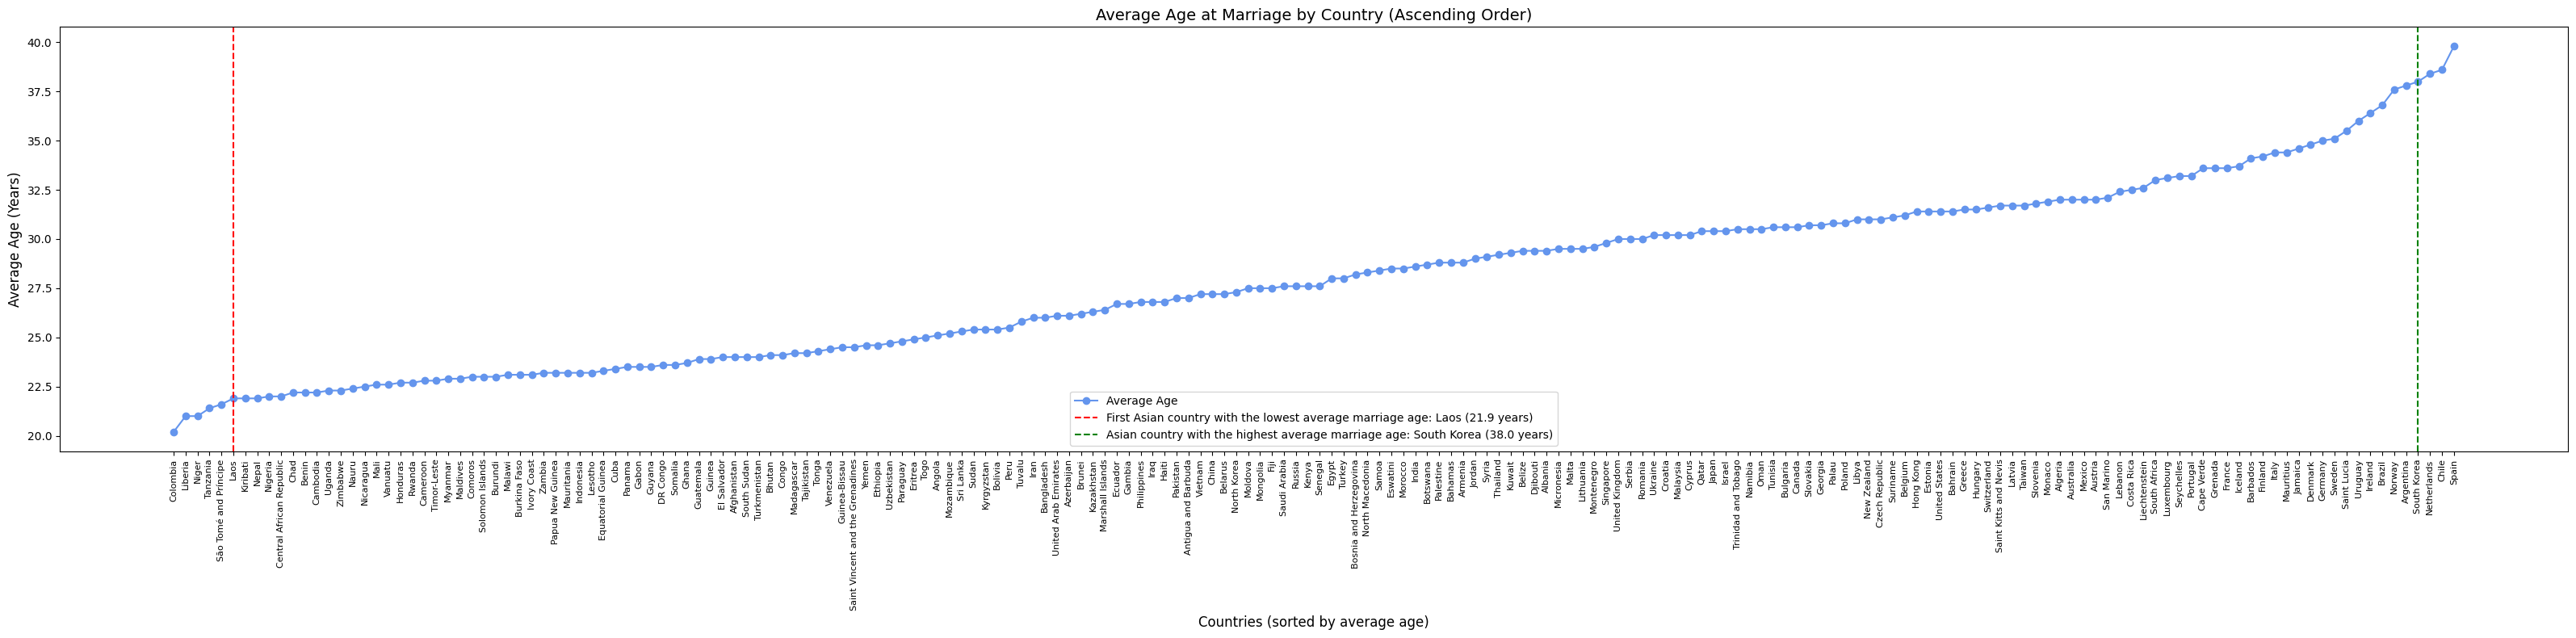

In [46]:


# Assuming `continent_data` is the dictionary containing all the data
all_countries = []
for continent, data in continent_data.items():
    df = pd.DataFrame(data)
    df['Continent'] = continent
    all_countries.append(df)

# Combine all data into one DataFrame
df_all = pd.concat(all_countries, ignore_index=True)

# Clean and prepare the data
df_all['Average'] = df_all['Average'].replace({',': ''}, regex=True).astype(float)
df_all = df_all.dropna(subset=['Average'])

# Sort by average age
df_all_sorted = df_all.sort_values(by='Average').reset_index(drop=True)

# Find the first and highest Asian country
first_asian_country = df_all_sorted[df_all_sorted['Continent'] == 'Asia'].iloc[0]
highest_asian_country = df_all_sorted[df_all_sorted['Continent'] == 'Asia'].iloc[-1]

# Plotting
plt.figure(figsize=(32, 8))
plt.plot(df_all_sorted['Country'], df_all_sorted['Average'], marker='o', color='#6495ED', label='Average Age')
plt.axvline(x=df_all_sorted[df_all_sorted['Country'] == first_asian_country['Country']].index[0],
            color='red', linestyle='--', label=f"First Asian country with the lowest average marriage age: {first_asian_country['Country']} ({first_asian_country['Average']} years)")
plt.axvline(x=df_all_sorted[df_all_sorted['Country'] == highest_asian_country['Country']].index[0],
            color='green', linestyle='--', label=f"Asian country with the highest average marriage age: {highest_asian_country['Country']} ({highest_asian_country['Average']} years)")

# Customize the plot
plt.title('Average Age at Marriage by Country (Ascending Order)', fontsize=14)
plt.xlabel('Countries (sorted by average age)', fontsize=12)
plt.ylabel('Average Age (Years)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


**Key Observations:**


- Highlighted by the **red line**, Laos or Nepal, both(21.9 years) **Asian countries**, rank **6th from the bottom globally** in terms of average age at first marriage.  
- This reflects **younger marriage trends**, potentially due to **cultural norms** or **economic factors** prevalent in parts of Asia.


- Highlighted by the **green line**, South Korea(38 years), another **Asian country**, ranks **4th from the top globally**.  
- This may indicate **delayed marriage trends** influenced by **urbanization**, **career priorities**, or **education** within Asia.

---

**Insights:**

**Diversity in Asia**
- Asian countries exhibit a **broad spectrum of marital ages**, from some of the **youngest** (e.g., Laos or Nepal) to near the **oldest** (e.g., South Korea) globally.  
- This highlights the region’s **vast cultural, social, and economic diversity**.

**Global Context**
- While some Asian countries align with **younger marriage trends** similar to other developing regions, others, like South Korea, reflect **patterns seen in developed nations**.

**The graph underscores Asia’s contrasting marriage trends, shaped by a mix of traditional and modern influences, depending on the country.**


# Year of Data Collection by Continent

In this analysis, we will begin by examining the number of countries in each continent, along with how many of these countries have collected data after 2018. Since the data for each country is collected in different years, this step is essential in identifying any trends and providing context for the data analysis. By understanding the distribut


## Number of Countries in Each Continent

In [47]:
# List of continents to iterate over
continents = ['Asia', 'Africa', 'Americas', 'Europe', 'Oceania']

# Iterate over each continent and calculate the number of countries
for continent in continents:
    df = pd.DataFrame(continent_data.get(continent, []))

    # Ensure the 'Country' column is present and clean it
    if 'Country' in df.columns:
        country_count = df['Country'].nunique()  # Count the unique number of countries
        print(f"Number of countries in {continent}: {country_count}")
    else:
        print(f"No data found for {continent}")


Number of countries in Asia: 48
Number of countries in Africa: 53
Number of countries in Americas: 33
Number of countries in Europe: 44
Number of countries in Oceania: 14


## Number of Countries with Data Collected After 2018 by Continent


In [48]:
# List of continents to iterate over
continents = ['Asia', 'Africa', 'Americas', 'Europe', 'Oceania']

# Iterate over each continent and calculate the number of countries with data after 2018
for continent in continents:
    df = pd.DataFrame(continent_data.get(continent, []))

    # Ensure the 'Country' and 'Year' columns are present and clean them
    if 'Country' in df.columns and 'Year' in df.columns:
        # Convert 'Year' to numeric, forcing errors to NaN
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

        # Filter the data to only include rows where 'Year' > 2018
        df_after_2018 = df[df['Year'] > 2018]

        # Count the unique number of countries with data after 2018
        country_count_after_2018 = df_after_2018['Country'].nunique()

        print(f"Number of countries in {continent} with data after 2018: {country_count_after_2018}")
    else:
        print(f"No data found for {continent}")


Number of countries in Asia with data after 2018: 27
Number of countries in Africa with data after 2018: 16
Number of countries in Americas with data after 2018: 11
Number of countries in Europe with data after 2018: 36
Number of countries in Oceania with data after 2018: 6


## Percentage of Countries with Data Collected After 2018 by Continent


In [49]:
# List of continents to iterate over
continents = ['Asia', 'Africa', 'Americas', 'Europe', 'Oceania']

# Iterate over each continent and calculate the percentage of countries with data after 2018
for continent in continents:
    df = pd.DataFrame(continent_data.get(continent, []))

    # Ensure the 'Country' and 'Year' columns are present and clean them
    if 'Country' in df.columns and 'Year' in df.columns:
        # Convert 'Year' to numeric, forcing errors to NaN
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

        # Count the total number of countries in the continent
        total_countries = df['Country'].nunique()

        # Filter the data to only include rows where 'Year' > 2018
        df_after_2018 = df[df['Year'] > 2018]

        # Count the unique number of countries with data after 2018
        country_count_after_2018 = df_after_2018['Country'].nunique()

        # Calculate the percentage
        if total_countries > 0:
            percentage_after_2018 = (country_count_after_2018 / total_countries) * 100
        else:
            percentage_after_2018 = 0

        print(f"Percentage of countries in {continent} with data after 2018: {percentage_after_2018:.2f}%")
    else:
        print(f"No data found for {continent}")


Percentage of countries in Asia with data after 2018: 56.25%
Percentage of countries in Africa with data after 2018: 30.19%
Percentage of countries in Americas with data after 2018: 33.33%
Percentage of countries in Europe with data after 2018: 81.82%
Percentage of countries in Oceania with data after 2018: 42.86%


## Year of Data Collection for Each Continent: Scatter Plot Visualization


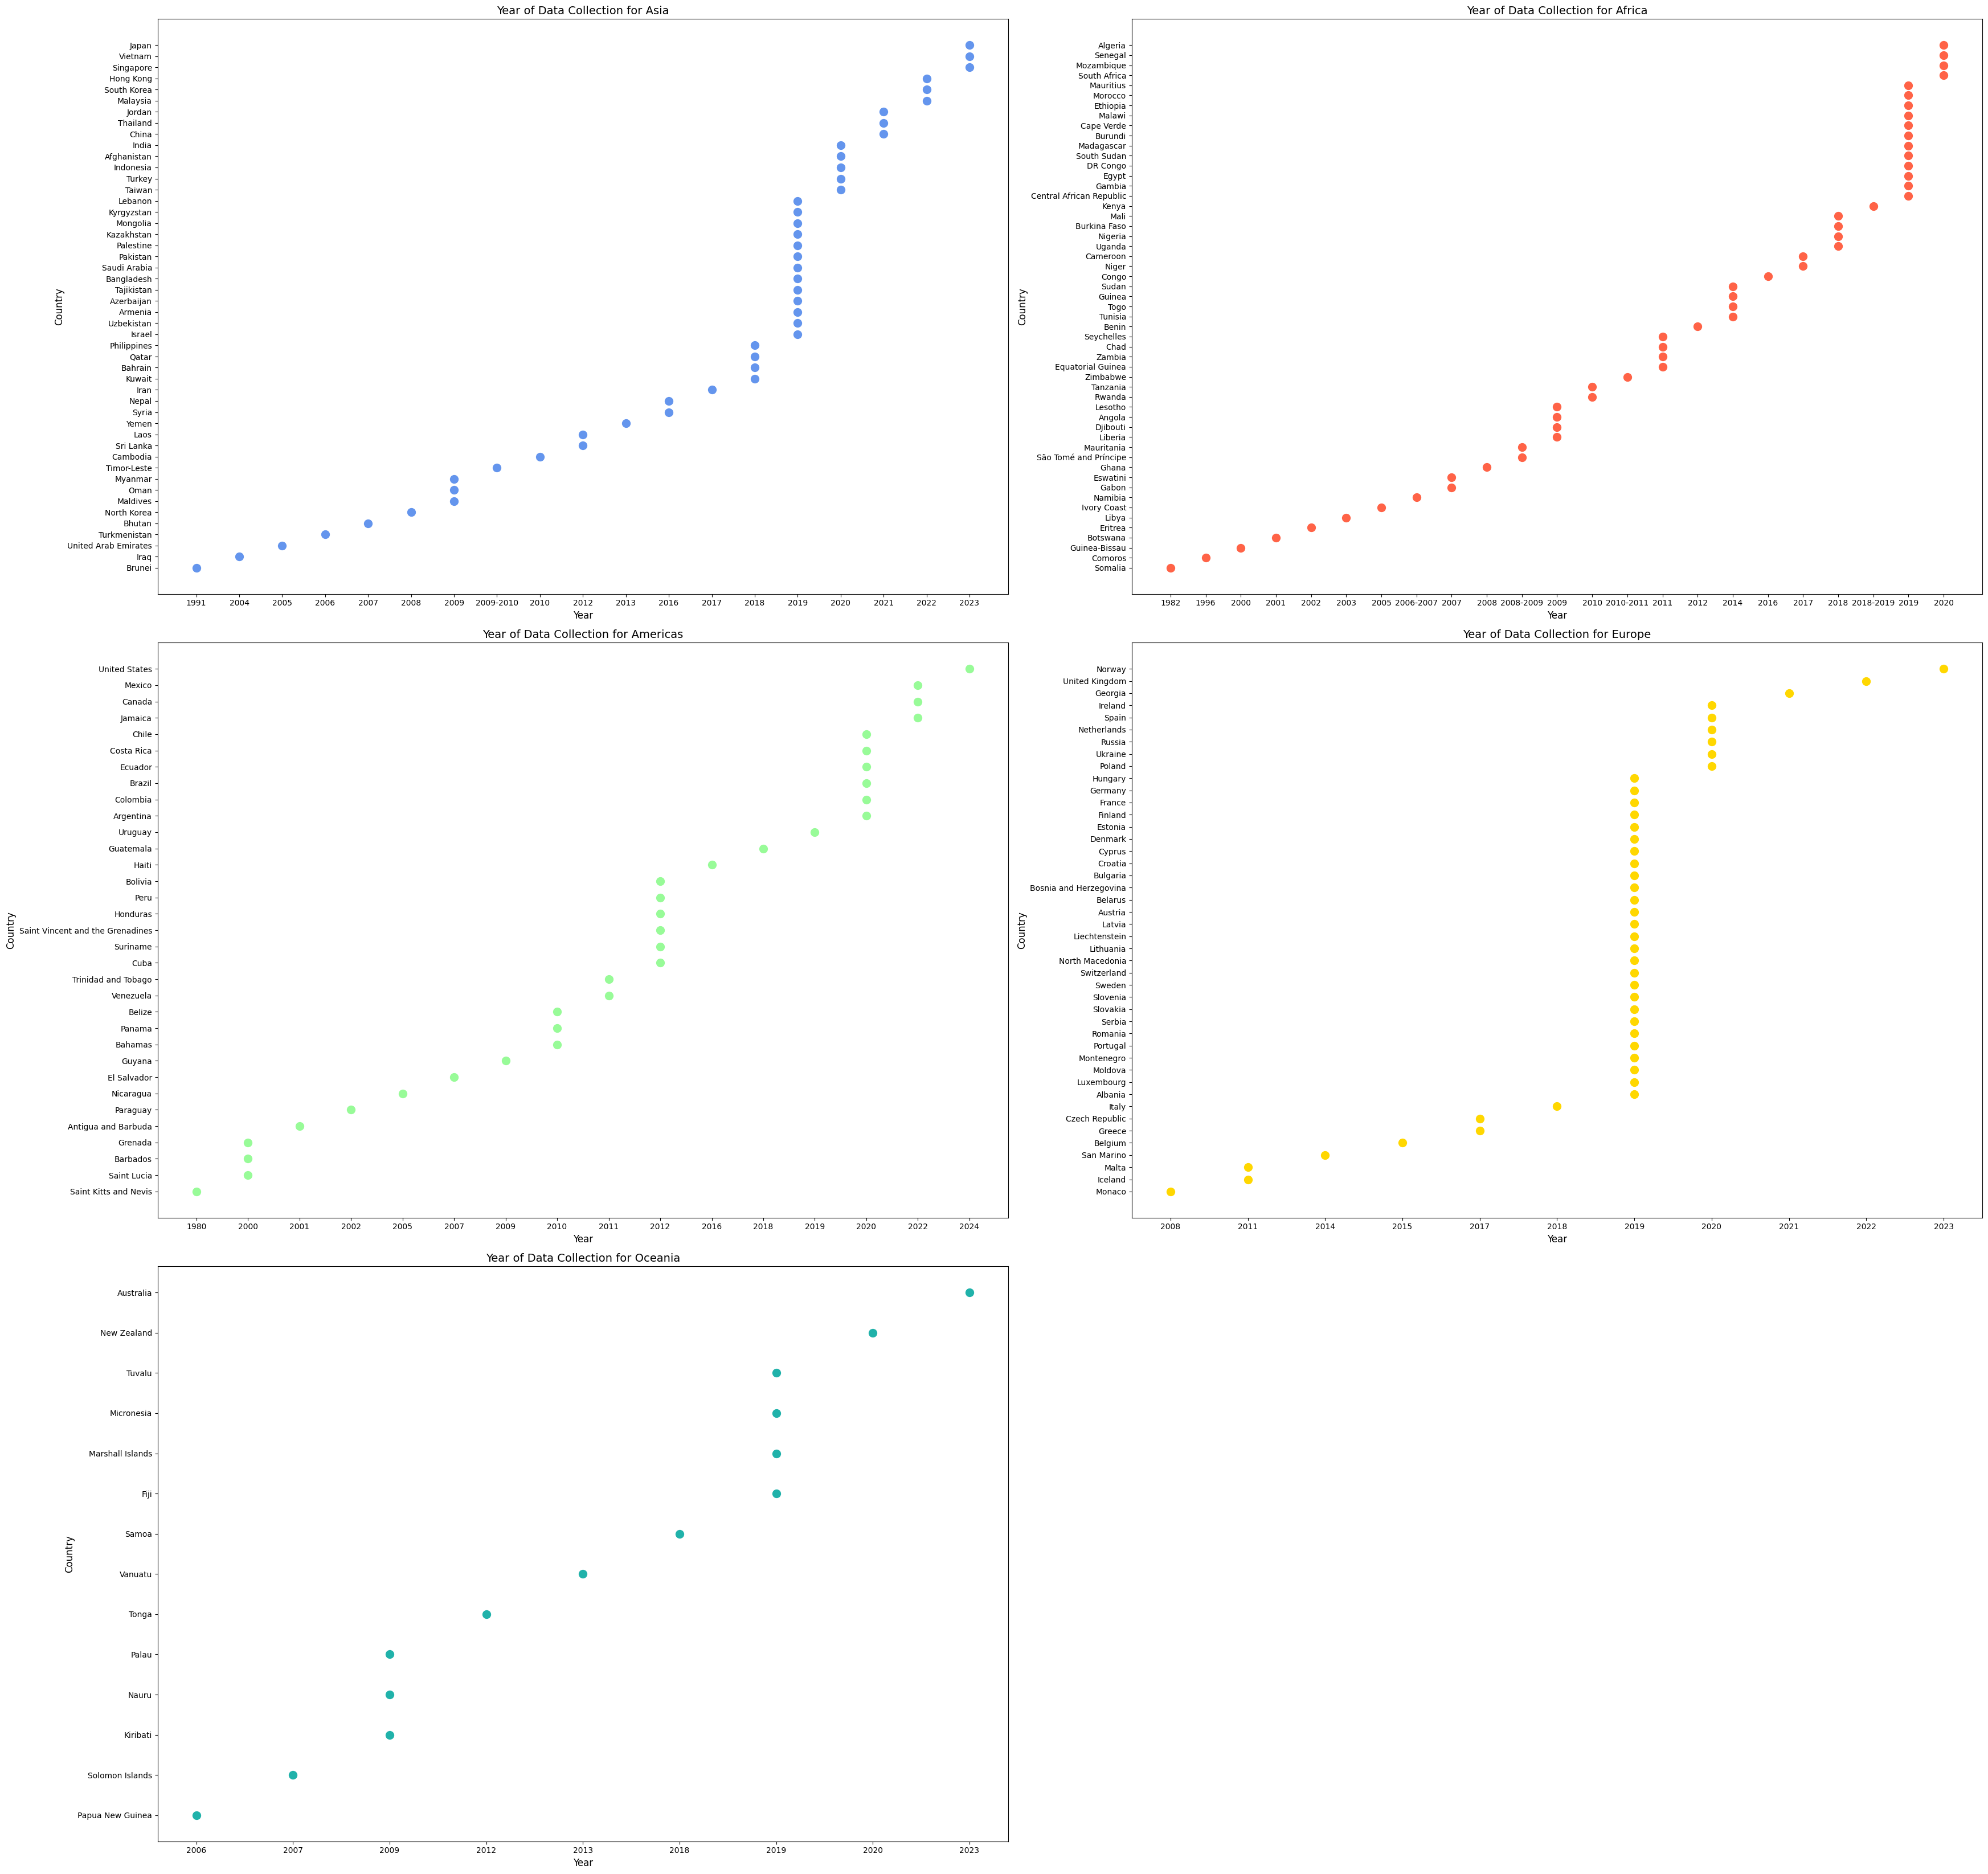

In [50]:

# Sort each DataFrame by 'Year'
df_asia_sorted = pd.DataFrame(continent_data.get('Asia', []))
df_africa_sorted = pd.DataFrame(continent_data.get('Africa', []))
df_americas_sorted = pd.DataFrame(continent_data.get('Americas', []))
df_europe_sorted = pd.DataFrame(continent_data.get('Europe', []))
df_oceania_sorted = pd.DataFrame(continent_data.get('Oceania', []))

# Sort the DataFrames by 'Year'
df_asia_sorted = df_asia_sorted.sort_values(by='Year')
df_africa_sorted = df_africa_sorted.sort_values(by='Year')
df_americas_sorted = df_americas_sorted.sort_values(by='Year')
df_europe_sorted = df_europe_sorted.sort_values(by='Year')
df_oceania_sorted = df_oceania_sorted.sort_values(by='Year')

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(35, 33))  # 3 rows, 2 columns, increased size

# Asia plot
axes[0, 0].scatter(df_asia_sorted['Year'], df_asia_sorted['Country'], color='#6495ED', s=100)
axes[0, 0].set_title('Year of Data Collection for Asia', fontsize=14)
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Country', fontsize=12)

# Africa plot
axes[0, 1].scatter(df_africa_sorted['Year'], df_africa_sorted['Country'], color='#FF6347', s=100)
axes[0, 1].set_title('Year of Data Collection for Africa', fontsize=14)
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Country', fontsize=12)

# Americas plot
axes[1, 0].scatter(df_americas_sorted['Year'], df_americas_sorted['Country'], color='#98FB98', s=100)
axes[1, 0].set_title('Year of Data Collection for Americas', fontsize=14)
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Country', fontsize=12)

# Europe plot
axes[1, 1].scatter(df_europe_sorted['Year'], df_europe_sorted['Country'], color='#FFD700', s=100)
axes[1, 1].set_title('Year of Data Collection for Europe', fontsize=14)
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Country', fontsize=12)

# Oceania plot
axes[2, 0].scatter(df_oceania_sorted['Year'], df_oceania_sorted['Country'], color='#20B2AA', s=100)
axes[2, 0].set_title('Year of Data Collection for Oceania', fontsize=14)
axes[2, 0].set_xlabel('Year', fontsize=12)
axes[2, 0].set_ylabel('Country', fontsize=12)

# Hide the empty subplot in the third row, second column
axes[2, 1].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### Limitations in Data Collection Years

One of the limitations mentioned earlier in the report is that the data on age at first marriage for the countries in each continent was not collected in the same year. In fact, the data collection years vary significantly between countries, which introduces a considerable challenge to the analysis.

For example, in the Americas, the earliest data was collected in 1980 for Saint Kitts and Nevis, while the most recent data was collected in 2024 for the United States. This variation in data collection years significantly affects the accuracy of the analysis.

### Earliest Data Collection Year for Each Continent

- **Asia**: 1991
- **Africa**: 1982
- **Americas**: 1980
- **Europe**: 2008
- **Oceania**: 2006

This inconsistency further complicates the analysis.

### Insights from the Data

- The number of countries in **Asia** is 48, with 27 (56.25%) having data collected after 2018.
- The number of countries in **Africa** is 53, with 16 (30.19%) having data collected after 2018.
- The number of countries in the **Americas** is 33, with 11 (33.33%) having data collected after 2018.
- The number of countries in **Europe** is 44, with 36 (81.82%) having data collected after 2018.
- The number of countries in **Oceania** is 14, with 6 (42.86%) having data collected after 2018.

### Continent Comparison Based on Data Collection After 2018

- **Europe**: The majority of countries (81.82%) have data collected after 2018, the highest percentage.
- **Asia**: 56.25% of countries have data collected after 2018.
- **Oceania**: 42.86% of countries have data collected after 2018.
- **Americas**: 33.33% of countries have data collected after 2018.
- **Africa**: 30.19% of countries have data collected after 2018, the lowest percentage.

In terms of the **majority** of countries with data collected after 2018, **Europe** leads with the highest percentage, followed by **Asia**. The **Americas** and **Africa** have relatively lower percentages, with **Africa** having the smallest proportion of countries with recent data.


# Summary:
This project investigates the "Age at First Marriage" across Asian countries, with a focus on gender differences and comparisons with global data. It provides a detailed statistical analysis, including mean, median, mode, standard deviation, and variance of the age at first marriage within Asia. The study further explores gender disparities by comparing the average age at first marriage for men and women. The project also expands its analysis by comparing Asia's data with other continents, taking into account the global rankings of countries based on age at first marriage, and exploring how the year of data collection might affect trends.

## Conclusion:
The findings of this project provide valuable insights into marriage trends within Asia, highlighting the differences in marriage ages between men and women and comparing these trends with other regions worldwide. The statistical analysis, alongside the gender-based and global comparisons, helps to identify patterns that may be influenced by cultural, social, and economic factors. While limitations such as missing data, discrepancies in data collection timeframes, and varying data collection methodologies must be acknowledged, the analysis provides a solid foundation for understanding how the age at first marriage varies across countries. This study could serve as a basis for further research into the factors influencing marriage age, offering a broader view of societal trends both in Asia and globally.


**Summary: Age at First Marriage in Asia and Global Comparisons**

| **Metric**                     | **Men**     | **Women**   | **Overall** |
|--------------------------------|-------------|-------------|-------------|
| Mean Age                       | 28.69 years | 25.68 years | 27.20 years |
| Most Frequent Age (Mode)        | 27.2 years  | 21.0 years  | -           |
| Median Age                      | 28.6 years  | 25.45 years | -           |
| Standard Deviation              | 3.20        | 3.42        | -           |
| Variance                        | 10.23       | 11.71       | -           |




| **Category**                    | **Key Finding**                                              |
|---------------------------------|-------------------------------------------------------------|
| Highest Average Age             | South Korea (38 years), Lebanon (32.4 years)                 |
| Lowest Average Age              | Nepal, Laos (21.9 years)                                     |
| Largest Age Gap                 | Syria (>5 years)                                             |
| Smallest Age Gap                | Singapore (<1 year)                                          |
| Common Age Gaps                 | Multiple countries share similar gaps (1.6 to 4.4 years)     |
| Global Rank in Mean Age         | 3rd (higher than Africa, Oceania; lower than Europe, Americas) |
| Global Rank in Age Gap          | Moderate (higher than Europe, Americas, Oceania; lower than Africa) |




- **Lowest Age**: Laos/Nepal (21.9 years), 6th lowest globally, reflecting younger marriage trends due to cultural or economic factors.
- **Highest Age**: South Korea (38 years), 4th highest globally, indicating delayed marriages influenced by urbanization, career, and education.


   **Data Notes**
- **Year Range**: 1991 to 2023, mostly post-2019.
- **Impact**: Variations in data collection years may affect comparability.
